## Importing Data

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, mean_squared_error, mean_absolute_error, accuracy_score


from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from functools import singledispatch
import sklearn
from sklearn.inspection import permutation_importance
import os
from sklearn.pipeline import make_pipeline


In [ ]:
#Load data in google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/student/student-mat.csv', sep=";")

In [ ]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


In [ ]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [ ]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

## Data preparation
Understanding what each attribute means in our data and what type of data they each contain

In [ ]:
# Opening notes from the dataset provider

file = open("/content/drive/MyDrive/student/student.txt", 'r')
print(file.read())

# Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
2 sex - student's sex (binary: "F" - female or "M" - male)
3 age - student's age (numeric: from 15 to 22)
4 address - student's home address type (binary: "U" - urban or "R" - rural)
5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or 

In [ ]:
uniques = pd.DataFrame(columns=["Feature", "Uniques", "num_unique"])

In [ ]:
for i in range(len(df.columns)):
    uniques.loc[i] = [df.columns[i]] + [df[df.columns[i]].unique()] + [df[df.columns[i]].nunique()]

In [ ]:
uniques

,Feature,Uniques,num_unique
0,school,"[GP, MS]",2
1,sex,"[F, M]",2
2,age,"[18, 17, 15, 16, 19, 22, 20, 21]",8
3,address,"[U, R]",2
4,famsize,"[GT3, LE3]",2
5,Pstatus,"[A, T]",2
6,Medu,"[4, 1, 3, 2, 0]",5
7,Fedu,"[4, 1, 2, 3, 0]",5
8,Mjob,"[at_home, health, other, services, teacher]",5
9,Fjob,"[teacher, other, services, health, at_home]",5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0


In [ ]:
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

## Plotting 

###Mean of grading periods

In [ ]:
df['mean_periods'] = (df.G1 + df.G2 + df.G3) / 3

(array([10., 17., 33., 43., 76., 73., 62., 52., 16., 13.]),
 array([ 1.33333333,  3.13333333,  4.93333333,  6.73333333,  8.53333333,
        10.33333333, 12.13333333, 13.93333333, 15.73333333, 17.53333333,
        19.33333333]),
 <a list of 10 Patch objects>)

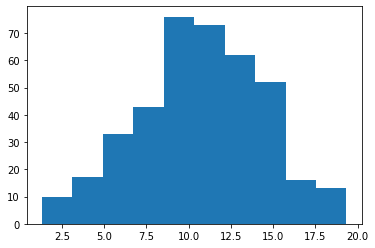

In [ ]:
plt.hist(df.mean_periods)

###Attributes by Final Grade (G3)

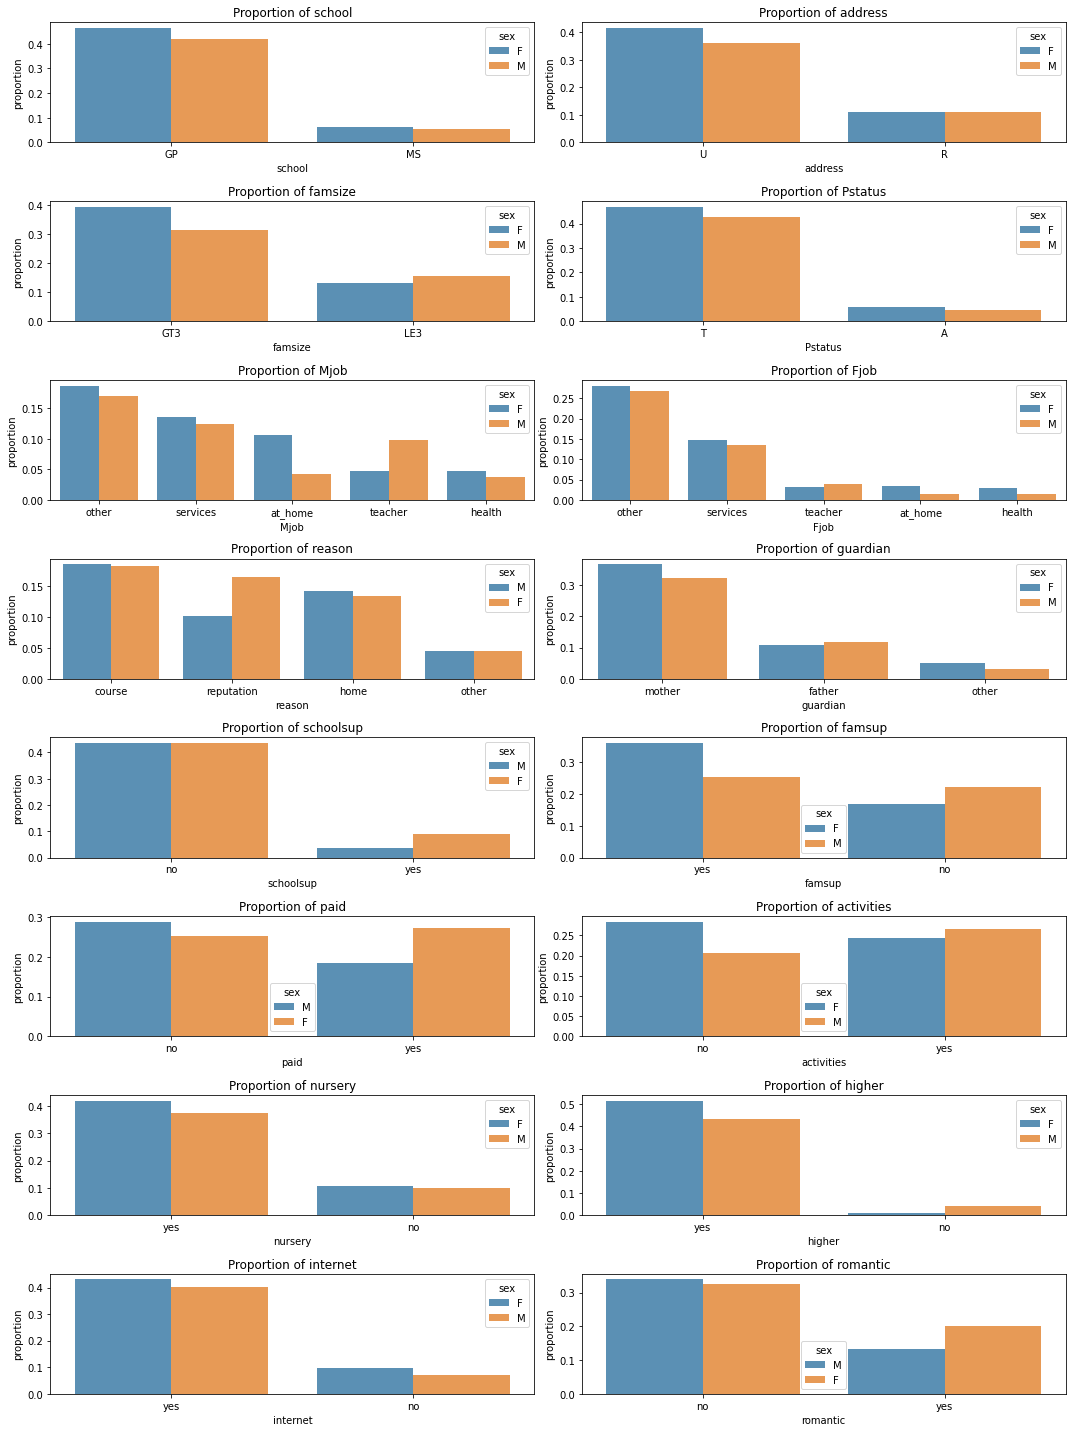

In [ ]:
cols_obj = list(df.dtypes[df.dtypes == object].index[0:])
cols_obj.pop(1)
i=1
plt.figure(figsize=[15,20])
y, hue = 'proportion', 'sex'

for f in cols_obj:
    plt.subplot(8,2,i)
    df[[f, 'sex']]\
       .value_counts(normalize=True)\
       .rename(y)\
       .reset_index()\
       .pipe((sns.barplot, "data"), x=f, y='proportion', hue='sex', alpha=0.8)
    plt.title(f'Proportion of {f}')
    i+=1
plt.tight_layout()



In [ ]:
cols_cont = [column for column in df.columns if column not in cols_obj and 
             column not in ['sex', 'Medu','Fedu','failures',]]

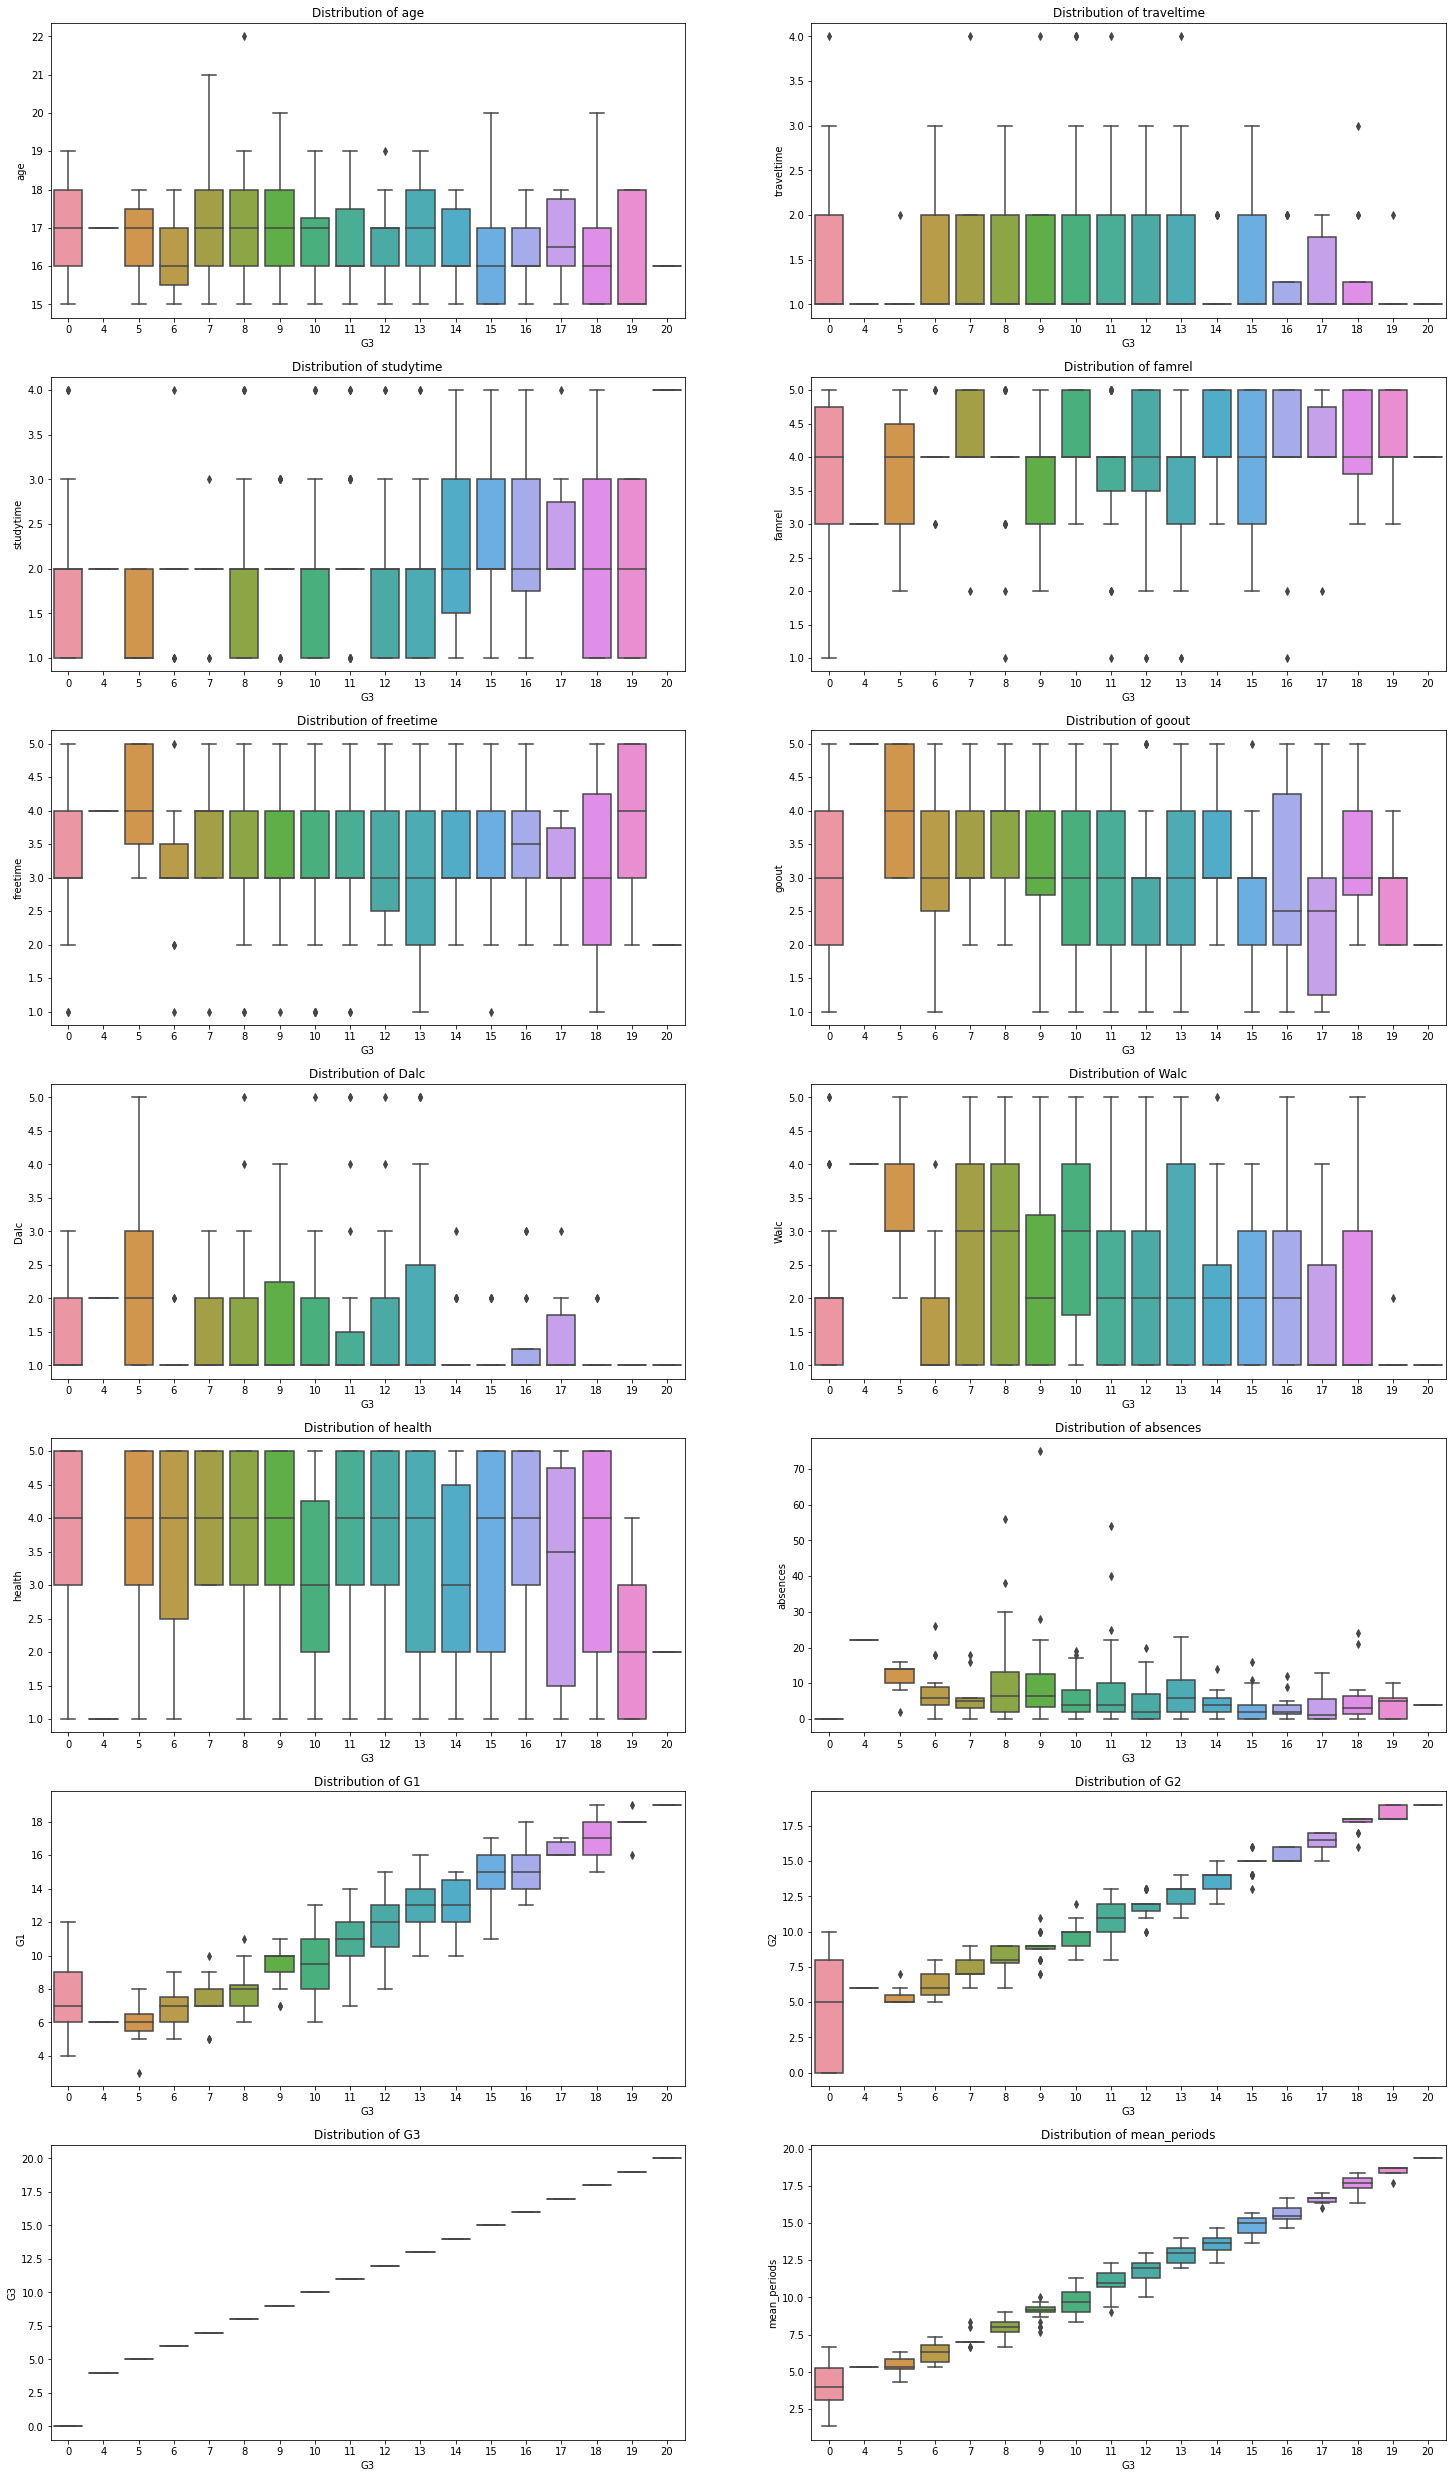

In [ ]:
plt.figure(figsize=[25, 90])
i = 1

for x in cols_cont:
    plt.subplot(14,2,i)
    sns.boxplot(x='G3', y=x, data=df)
    i+=1
    plt.title(f'Distribution of {x}')

###Studytime by Gender

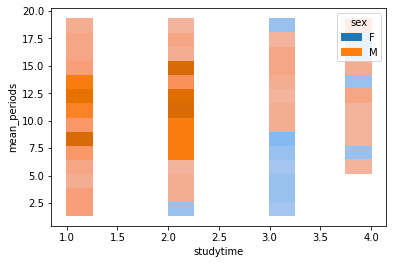

In [ ]:
sns.histplot(data=df, x='studytime', y='mean_periods', hue='sex')

Boys spend less time on studying than girls

###General Performance by Gender (Using G3)

In [ ]:
df.groupby('sex')['mean_periods'].mean()

sex
F    10.325321
M    11.073084
Name: mean_periods, dtype: float64

boys have higher average of all grading periods

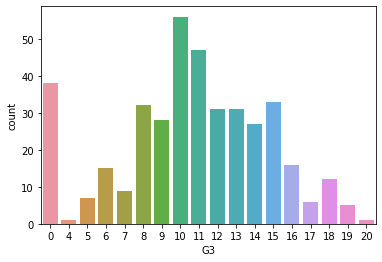

In [ ]:
sns.countplot(data=df, x='G3')  #Count of all G3 grades

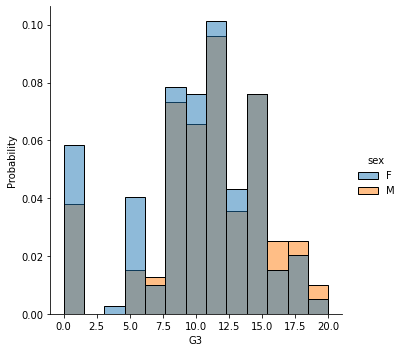

In [ ]:
sns.displot(x='G3',
           hue='sex', 
           data=df,
           stat='probability')

In general boys study better than girls

###Performance by Internet Accessibility

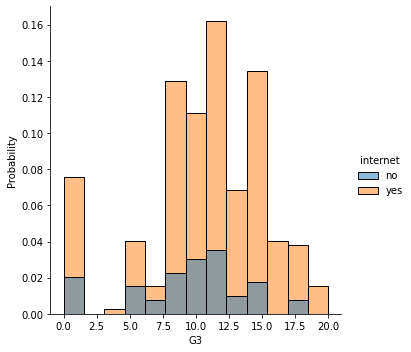

In [ ]:
sns.displot(x='G3',
           hue='internet', 
           data=df,
           stat='probability')

Internet improves your marks!

###Performance by paying for extra classes

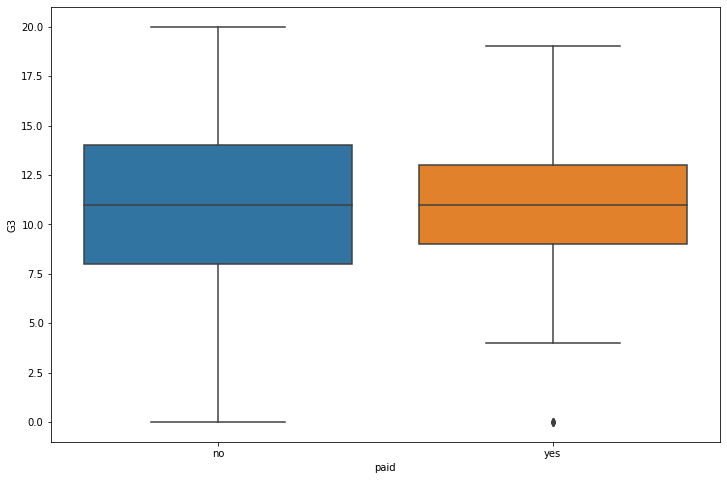

In [ ]:
plt.figure(figsize=[12,8])
sns.boxplot(x='paid', y='G3', data=df)

Students who don't take paid classes have better 
marks

###Alcohol Consumption(Workday/Weekend) by Gender

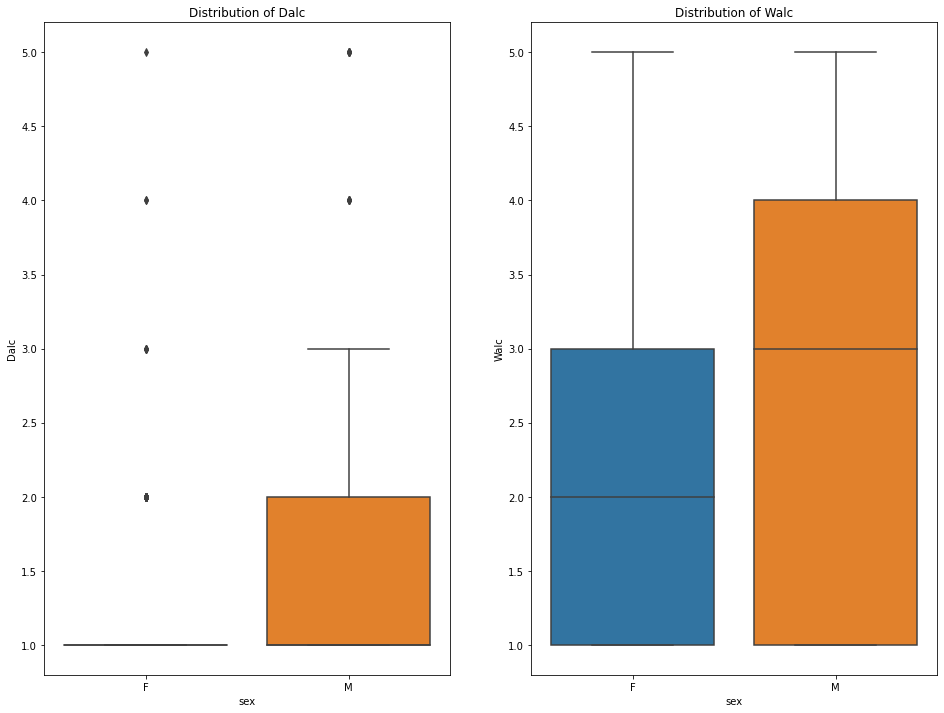

In [ ]:
alco = ['Dalc', 'Walc']
plt.figure(figsize=[16,12])
i = 1

for x in alco:
    plt.subplot(1,2,i)
    sns.boxplot(x='sex', y=x, data=df)
    i+=1
    plt.title(f'Distribution of {x}')

Usually student's parents consume alcohol on weekends. But boys parents like to drink during workdays and parents of boys consume more alcohol in general

###Absences by Gender

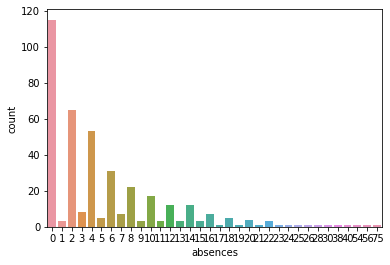

In [ ]:
sns.countplot(df.absences) # Count of all absences

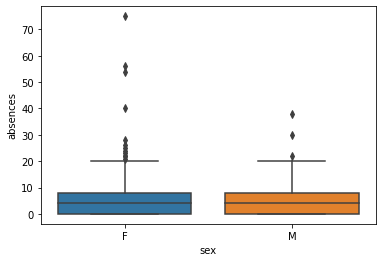

In [ ]:
sns.boxplot(x='sex', y='absences', data=df)

Boys and Girls are absent from school identically. But among girls there are some outliers

###Correlation Matrix Plotting

In [ ]:
cols_num = list(df.dtypes[df.dtypes == 'int64'].index[0:])

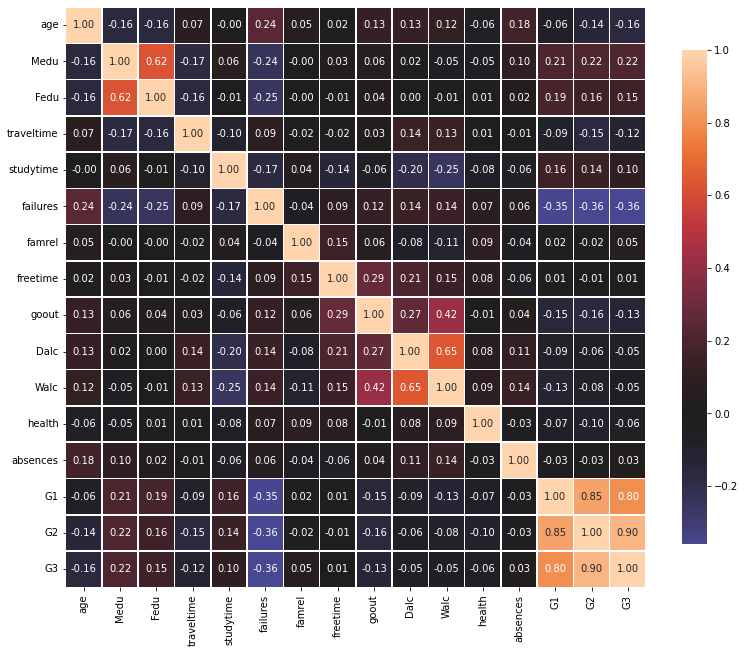

In [ ]:
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(13,13))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(df[cols_num])

## Encoding variables

In [ ]:
category_df = df.select_dtypes(include=['object'])

In [ ]:
df_dummy = pd.get_dummies(category_df)

In [ ]:
df_dummy['G3'] = df['G3']

###Correlation of encoded variables

In [ ]:
df_dummy.corr()['G3'].sort_values(ascending=False)

G3                   1.000000
higher_yes           0.182465
romantic_no          0.129970
Mjob_health          0.116158
address_U            0.105756
sex_M                0.103456
paid_yes             0.101996
internet_yes         0.098483
reason_reputation    0.095692
Fjob_teacher         0.095374
schoolsup_no         0.082788
famsize_LE3          0.081407
Mjob_services        0.078429
Pstatus_A            0.058009
Mjob_teacher         0.057712
Fjob_health          0.057111
reason_other         0.052008
nursery_yes          0.051568
school_GP            0.045017
famsup_no            0.039157
guardian_father      0.032493
guardian_mother      0.022338
activities_yes       0.016100
Fjob_at_home        -0.013385
activities_no       -0.016100
Fjob_services       -0.016108
reason_home         -0.021359
famsup_yes          -0.039157
school_MS           -0.045017
nursery_no          -0.051568
Fjob_other          -0.053483
Pstatus_T           -0.058009
famsize_GT3         -0.081407
schoolsup_

In [ ]:
y = df['G3']

X = df.drop(['G1', 'G2', 'mean_periods', 'school'], axis=1)

X = pd.get_dummies(X)

^We drop G1 and G2 and school because they highly correlate with G3^

In [ ]:
most_correlated = X.corr().abs()['G3'].sort_values(ascending=False)


In [ ]:
most_correlated = most_correlated[:9]
most_correlated

G3             1.000000
failures       0.360415
Medu           0.217147
higher_yes     0.182465
higher_no      0.182465
age            0.161579
Fedu           0.152457
goout          0.132791
romantic_no    0.129970
Name: G3, dtype: float64

In [ ]:
X = X.loc[:, most_correlated.index]
X

,G3,failures,Medu,higher_yes,higher_no,age,Fedu,goout,romantic_no
0,6,0,4,1,0,18,4,4,1
1,6,0,1,1,0,17,1,3,1
2,10,3,1,1,0,15,1,2,1
3,15,0,4,1,0,15,2,2,0
4,10,0,3,1,0,16,3,2,1
...,...,...,...,...,...,...,...,...,...
390,9,2,2,1,0,20,2,4,1
391,16,0,3,1,0,17,1,5,1
392,7,3,1,1,0,21,1,3,1
393,10,0,3,1,0,18,2,1,1


###Correlation Plotting

In [ ]:
sns.set(rc = {'figure.figsize':(10,6)})

####Parent education

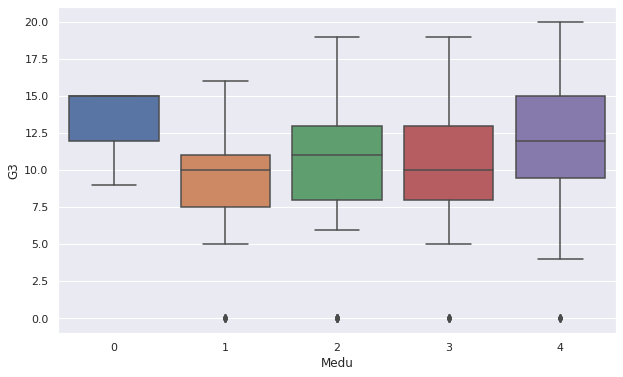

In [ ]:
sns.boxplot(x='Medu', y='G3', data=X)

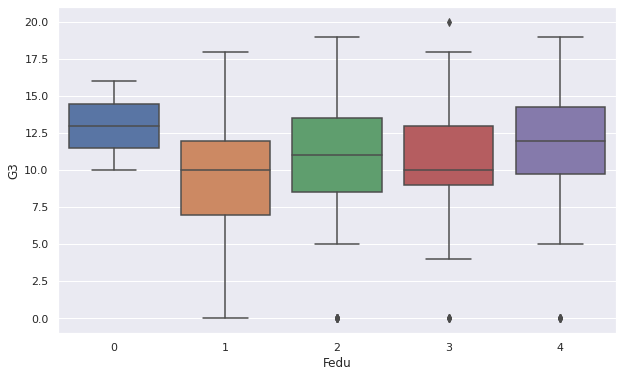

In [ ]:
sns.boxplot(x='Fedu', y='G3', data=X)

**Students whose parents have better education score higher**

####Age

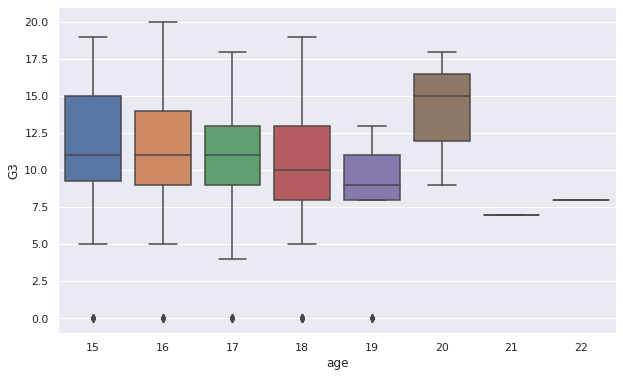

In [ ]:
sns.boxplot(data=X, x='age', y='G3')

**Age does not affect score**

####Failures

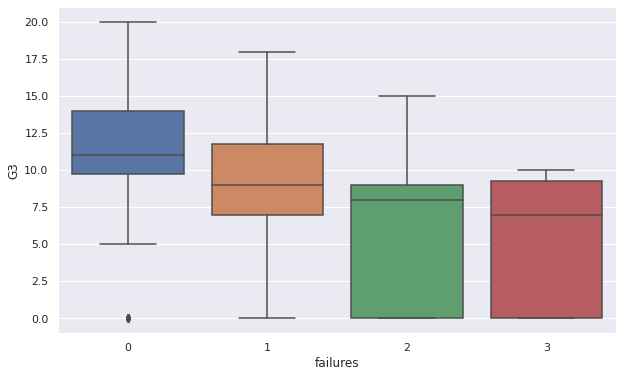

In [ ]:
sns.boxplot(data=X, x='failures', y='G3')

**Students with less failures score more**

####Going Out

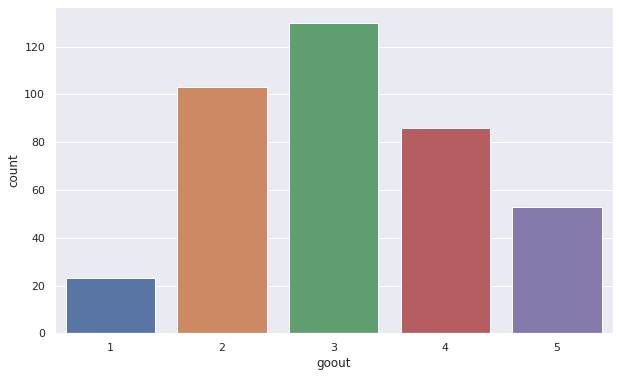

In [ ]:
sns.countplot(data=X, x='goout')

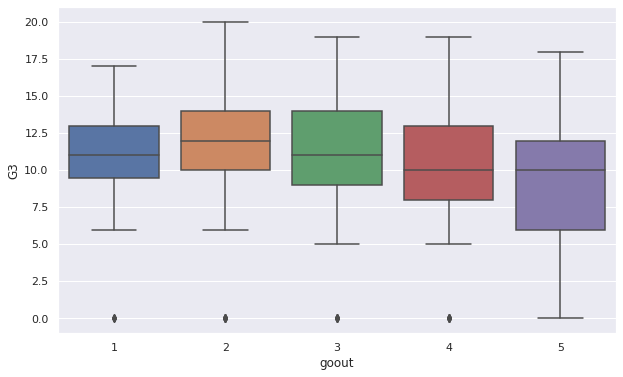

In [ ]:
sns.boxplot(data=X, x='goout', y='G3')

**Students who go out less score better**

####Higher Education Pursuit

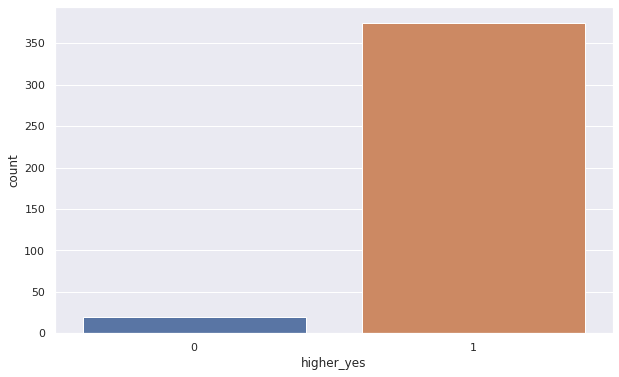

In [ ]:
sns.countplot(data=X, x='higher_yes')

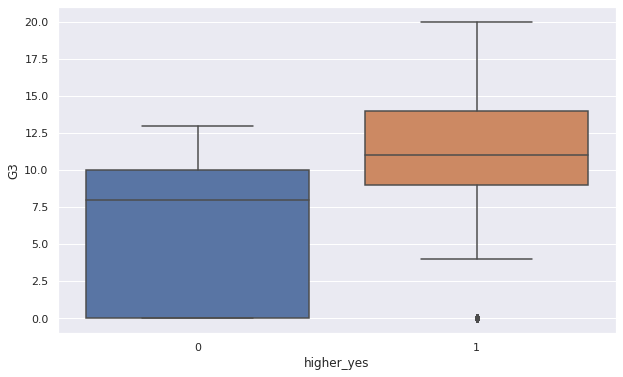

In [ ]:
sns.boxplot(data=X, x='higher_yes', y='G3')

**Students who want to take higher education score better**

####No Romantic Relationship

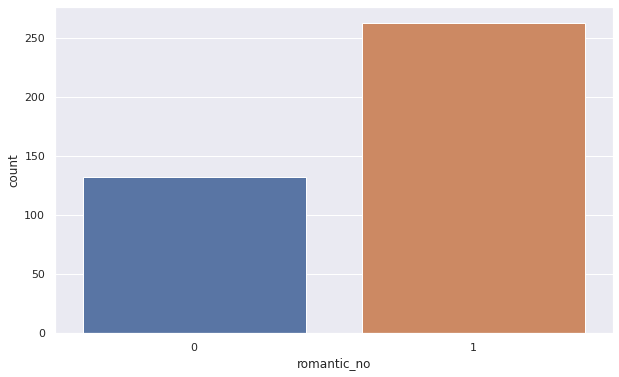

In [ ]:
sns.countplot(data=X, x='romantic_no')

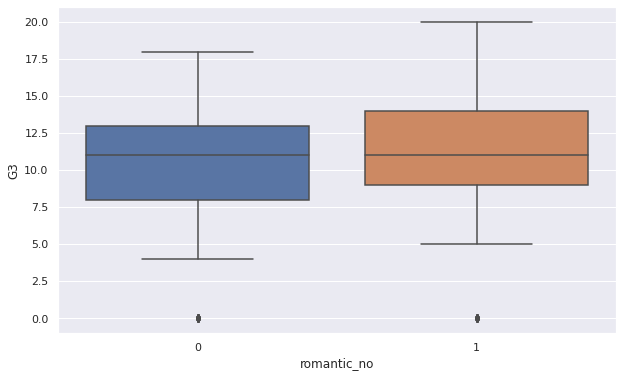

In [ ]:
sns.boxplot(data=X, x='romantic_no', y='G3')

**Students who do not have romantic relat. score better**

## Modeling

###Predicting G3 through regression

####Regression Prep

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=17)

In [ ]:
X_train = X_train.drop('G3', axis=1)
X_test = X_test.drop('G3', axis=1)

In [ ]:
models_df =  pd.DataFrame(columns=['mae', 'rmse'])

In [ ]:
def make_report(models_df, model, X_test, y_test, name):
    report = pd.DataFrame(columns={'mae'}, data=[0])
    
    report['mae'] = mean_absolute_error(y_test, model.predict(X_test).round())
    report['rmse'] = np.sqrt(mean_squared_error(y_test, model.predict(X_test).round()))

    report.index = [name]
    models_df = models_df.append(report)
    return models_df

####Linear Regression Raw

In [ ]:
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

In [ ]:
models_df = make_report(models_df, linear, X_test, y_test, 'Linear_regression')

In [ ]:
models_df

,mae,rmse
Linear_regression,3.327731,4.338609


####Random Forest Raw

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
models_df = make_report(models_df, rf, X_test, y_test, 'RandomForest')

In [ ]:
models_df

,mae,rmse
Linear_regression,3.327731,4.338609
RandomForest,3.798319,4.847246


####Decision Tree Raw

In [ ]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
models_df = make_report(models_df, tree, X_test, y_test, 'Decision Tree')

In [ ]:
models_df

,mae,rmse
Linear_regression,3.327731,4.338609
RandomForest,3.798319,4.847246
Decision Tree,4.588235,5.859704


####Decision Tree GridSearchCV

In [ ]:
%%time
kf = KFold(n_splits=3,shuffle=True, random_state=17)
tree = DecisionTreeRegressor()
params = {
    'criterion': ['mse', 'mae'],
    'max_depth': range(3,15),
    'min_samples_split': range(2, 6),
    'min_samples_leaf': range(1, 6),
}

tree_gs = GridSearchCV(tree, param_grid=params, cv=kf, verbose=2, n_jobs=-1)
tree_gs.fit(X_train, y_train)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits
CPU times: user 1.87 s, sys: 146 ms, total: 2.02 s
Wall time: 12.1 s


In [ ]:
models_df = make_report(models_df, tree_gs, X_test, y_test, 'Decision_Tree_GridSearchCV')

In [ ]:
models_df

,mae,rmse
Linear_regression,3.327731,4.338609
RandomForest,3.798319,4.847246
Decision Tree,4.588235,5.859704
Decision_Tree_GridSearchCV,3.436975,4.543903


###Model Plotting

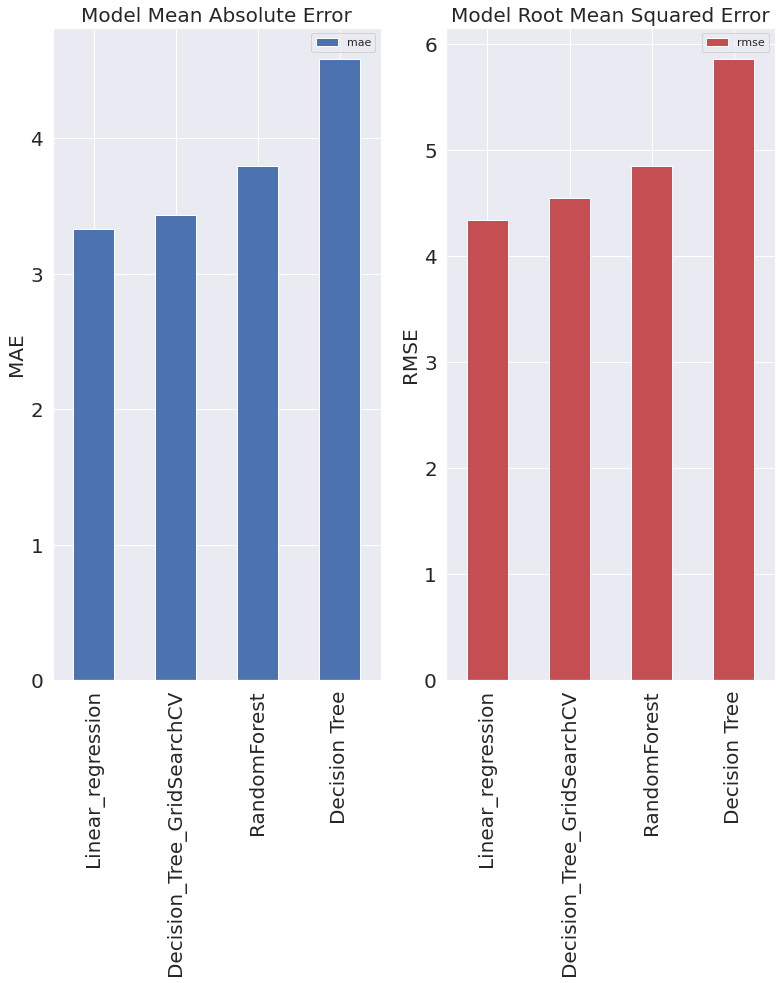

In [ ]:
plt.figure(figsize=(20, 12))

# Root mean squared error
ax =  plt.subplot(1, 3, 1)
models_df.sort_values('mae', ascending = True).plot.bar(y = 'mae', color = 'b', ax = ax, fontsize=20)
plt.title('Model Mean Absolute Error', fontsize=20) 
plt.ylabel('MAE', fontsize=20)

# Median absolute percentage error
ax = plt.subplot(1, 3, 2)
models_df.sort_values('rmse', ascending = True).plot.bar(y = 'rmse', color = 'r', ax = ax, fontsize=20)
plt.title('Model Root Mean Squared Error', fontsize=20) 
plt.ylabel('RMSE',fontsize=20)

plt.show()

####Conclusion: Linear regression has the best MAE and RMSE

####Let's see what results we will get if we use all features, except G1 and G2

## Testing Models with all features

In [ ]:
X_all = df.drop(['G1', 'G2', 'G3', 'mean_periods'], axis = 1)

####Scaled features

In [ ]:
X_scaled = X_all

In [ ]:
X_scaled[['age', 'absences']] = MinMaxScaler(feature_range=(1,4)).fit_transform(X_all[['age', 'absences']])

In [ ]:
X_scaled = pd.get_dummies(X_scaled)

In [ ]:
X_scaled

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,2.285714,4,4,2,2,0,4,3,4,1,1,3,1.24,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0
1,1.857143,1,1,1,2,0,5,3,3,1,1,3,1.16,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0
2,1.000000,1,1,1,2,3,4,3,2,2,3,3,1.40,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,1.000000,4,2,1,3,0,3,2,2,1,1,5,1.08,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1
4,1.428571,3,3,1,2,0,4,3,2,1,2,5,1.16,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,3.142857,2,2,1,2,2,5,5,4,4,5,4,1.44,0,1,0,1,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0
391,1.857143,3,1,2,1,0,2,4,5,3,4,2,1.12,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0
392,3.571429,1,1,1,1,3,5,5,3,3,3,3,1.12,0,1,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0
393,2.285714,3,2,3,1,0,4,4,1,3,4,5,1.00,0,1,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0


In [ ]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=.3, random_state=17)

#####Linear Regression All scaled

In [ ]:
linear = LinearRegression()
linear.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [ ]:
models_df = make_report(models_df, linear, X_test_scaled, y_test_scaled, 'Linear_regression_all_scaled')

In [ ]:
models_df

,mae,rmse
Linear_regression,3.327731,4.338609
RandomForest,3.798319,4.847246
Decision Tree,4.588235,5.859704
Decision_Tree_GridSearchCV,3.436975,4.543903
Linear_regression_all_scaled,3.605042,4.666166


###Unscaled features

In [ ]:
X_train_unscaled, X_test_unscaled, y_train_unscaled, y_test_unscaled = train_test_split(pd.get_dummies(X_all), y, test_size=.3, random_state=42)

####Linear regression Unscaled

In [ ]:
linear = LinearRegression()
linear.fit(X_train_unscaled, y_train_unscaled)

LinearRegression()

In [ ]:
models_df = make_report(models_df, linear, X_test_unscaled, y_test_unscaled, 'Linear_regression_all_unscaled')

In [ ]:
models_df

,mae,rmse
Linear_regression,3.327731,4.338609
RandomForest,3.798319,4.847246
Decision Tree,4.588235,5.859704
Decision_Tree_GridSearchCV,3.436975,4.543903
Linear_regression_all_scaled,3.605042,4.666166
Linear_regression_all_unscaled,3.285714,4.227759


**We've got different answers. Maybe it is because of seed**

###Unscaled features(with same seed as scaled)

In [ ]:
X_train_unscaled, X_test_unscaled, y_train_unscaled, y_test_unscaled = train_test_split(pd.get_dummies(X_all), y, test_size=.3, random_state=17)

####Linear regression Unscaled

In [ ]:
linear = LinearRegression()
linear.fit(X_train_unscaled, y_train_unscaled)

LinearRegression()

In [ ]:
models_df = make_report(models_df, linear, X_test_unscaled, y_test_unscaled, 'Linear_regression_all_unscaled_same_seed')

In [ ]:
models_df

,mae,rmse
Linear_regression,3.327731,4.338609
RandomForest,3.798319,4.847246
Decision Tree,4.588235,5.859704
Decision_Tree_GridSearchCV,3.436975,4.543903
Linear_regression_all_scaled,3.605042,4.666166
Linear_regression_all_unscaled,3.285714,4.227759
Linear_regression_all_unscaled_same_seed,3.605042,4.666166


###Model Plotting

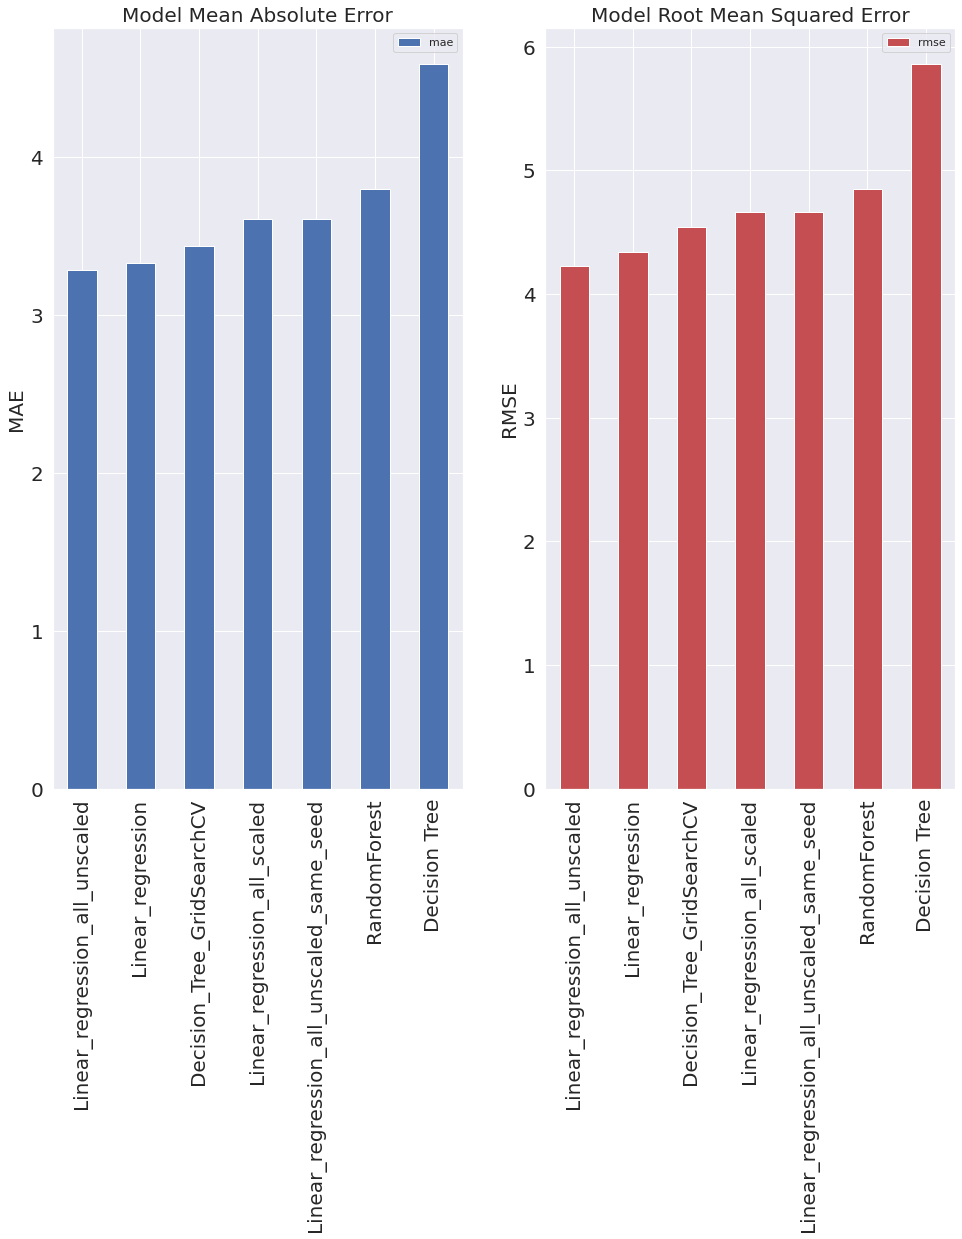

In [ ]:
plt.figure(figsize=(25, 14))

# Root mean squared error
ax =  plt.subplot(1, 3, 1)
models_df.sort_values('mae', ascending = True).plot.bar(y = 'mae', color = 'b', ax = ax, fontsize=20)
plt.title('Model Mean Absolute Error', fontsize=20) 
plt.ylabel('MAE', fontsize=20)

# Median absolute percentage error
ax = plt.subplot(1, 3, 2)
models_df.sort_values('rmse', ascending = True).plot.bar(y = 'rmse', color = 'r', ax = ax, fontsize=20)
plt.title('Model Root Mean Squared Error', fontsize=20) 
plt.ylabel('RMSE',fontsize=20)

plt.show()

###Conclusion: Best model : LogisticRegression with all features, no matter scaled or unscaled